In [1]:
import numpy as np
import pandas as pd

In [2]:
import pickle
import os
from tensorflow import keras

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding = 'latin')
    return dict

In [4]:
def load_batch_data(batch_file):
    filepath = os.path.join('D:/downloads/cifar-10-batches-py/', batch_file)
    unpickled = unpickle(filepath)
    return unpickled

In [5]:
batch_file_1 = load_batch_data('data_batch_1')
batch_file_2 = load_batch_data('data_batch_2')
batch_file_3 = load_batch_data('data_batch_3')
batch_file_4 = load_batch_data('data_batch_4')
batch_file_5 = load_batch_data('data_batch_5')
test_file = load_batch_data('test_batch')

In [6]:
x_train = np.concatenate([batch_file_1['data'],batch_file_2['data'],batch_file_3['data'],batch_file_4['data'],batch_file_5['data']])

In [7]:
x_test = test_file['data']

In [8]:
from keras.utils import np_utils
y_train = np.concatenate([np_utils.to_categorical(batch_file_1['labels'],10),np_utils.to_categorical(batch_file_2['labels'],10),np_utils.to_categorical(batch_file_3['labels'],10),np_utils.to_categorical(batch_file_4['labels'],10),np_utils.to_categorical(batch_file_5['labels'],10)])

In [9]:
y_test = np_utils.to_categorical(test_file['labels'],10)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
# data preprocessing

In [12]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
x_train.shape

(50000, 3072)

# MODEL BUILDING

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
# ANN

In [16]:
ANN_model = Sequential()
ANN_model.add(Dense(50, activation = 'relu', input_shape = (3072,)))
ANN_model.add(Dense(10, activation = 'softmax'))
ANN_model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
ANN = ANN_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9414 - accuracy: 0.3012 - val_loss: 1.9075 - val_accuracy: 0.3121
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7658 - accuracy: 0.3742 - val_loss: 1.7123 - val_accuracy: 0.4005
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6914 - accuracy: 0.4010 - val_loss: 1.6697 - val_accuracy: 0.4084
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6431 - accuracy: 0.4199 - val_loss: 1.6553 - val_accuracy: 0.4044
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6068 - accuracy: 0.4310 - val_loss: 1.6240 - val_accuracy: 0.4312
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5787 - accuracy: 0.4438 - val_loss: 1.6175 - val_accuracy: 0.4221
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5550 - accuracy: 0.4514 - val_loss: 1.5487 - val_accurac

In [17]:
import matplotlib.pyplot as plt

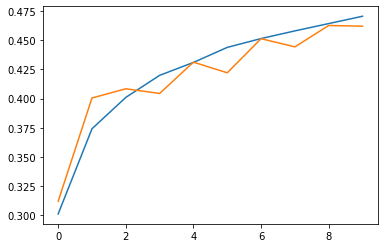

In [18]:
plt.plot(ANN.history['accuracy'])
plt.plot(ANN.history['val_accuracy'])

In [19]:
# CNN

In [20]:
# Reshaping
x_train = x_train.reshape(50000, 32,32,3)
x_test = x_test.reshape(10000, 32,32,3)
x_train.shape[1:]

(32, 32, 3)

In [21]:
from keras.layers import Conv2D, Dropout, Dense, MaxPooling2D, Flatten

In [25]:
CNN_model = Sequential()
CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',input_shape=x_train.shape[1:], activation = 'relu'))
CNN_model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same'))
CNN_model.add(MaxPooling2D(2))
CNN_model.add(Dropout(0.2))


CNN_model.add(Flatten())
CNN_model.add(Dense(50, activation = 'softmax'))
CNN_model.add(Dropout(0.2))
CNN_model.add(Dense(10, activation = 'softmax'))

CNN_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
CNN = CNN_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 162s 103ms/step - loss: 2.0672 - accuracy: 0.2483 - val_loss: 1.8654 - val_accuracy: 0.3711
Epoch 2/5
1563/1563 [==============================] - 160s 103ms/step - loss: 1.7931 - accuracy: 0.3491 - val_loss: 1.6309 - val_accuracy: 0.4297
Epoch 3/5
1563/1563 [==============================] - 158s 101ms/step - loss: 1.6641 - accuracy: 0.3805 - val_loss: 1.5097 - val_accuracy: 0.4640
Epoch 4/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.5927 - accuracy: 0.4019 - val_loss: 1.4842 - val_accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 159s 102ms/step - loss: 1.5375 - accuracy: 0.4251 - val_loss: 1.4137 - val_accuracy: 0.4979


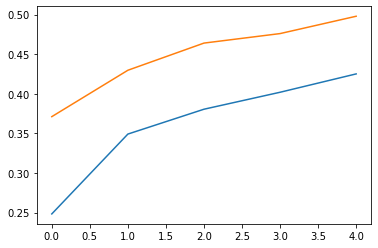

In [26]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.show()

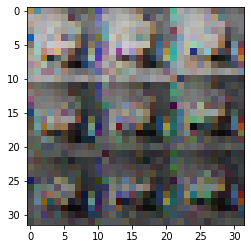

In [30]:
my_image = x_test[5]
plt.imshow(my_image)

In [31]:
# correctly predicted as a Horse
np.argmax(CNN_model.predict(my_image.reshape(1, 32, 32, 3)))

1/1 [==============================] - 0s 59ms/step


6